In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize, poly, ModelSpec as MS, bs, ns)
from ISLP.transforms import BSpline, NaturalSpline
from statsmodels.stats.anova import anova_lm
from pygam import (s as s_gam, l as l_gam, f as f_gam, LinearGAM, LogisticGAM)
from ISLP.pygam import (approx_lam, degrees_of_freedom, plot as plot_gam, anova as anova_gam)

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
Wage = load_data('Wage')
y = Wage['wage']
age = Wage['age']

In [4]:
poly_age = MS([poly('age', degree=4)]).fit(Wage)
model = sm.OLS(y, poly_age.transform(Wage)).fit()
summarize(model)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,coef,std err,t,P>|t|
intercept,111.7036,0.729,153.283,0.000
"poly(age, degree=4)[0]",447.0679,39.915,11.201,0.000
"poly(age, degree=4)[1]",-478.3158,39.915,-11.983,0.000
"poly(age, degree=4)[2]",125.5217,39.915,3.145,0.002
"poly(age, degree=4)[3]",-77.9112,39.915,-1.952,0.051


In [6]:
def plot_wage_fit(age_df, basis, title):
    X = basis.transform(Wage)
    X_new = basis.transform(age_df)
    model = sm.OLS(y, X).fit()
    preds = model.get_prediction(X_new)
    bands = preds.conf_int(alpha=0.05)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.scatter(age, y, facecolor='gray', alpha=0.5)
    for val, ls in zip([preds.predicted_mean, bands[:, 0], bands[:, 1]], ['b', 'r--', 'r--']):
        ax.plot(age_df.values, val, ls, linewidth=3)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Wage', fontsize=12)
    return ax

In [7]:
age_grid = np.linspace(age.min(), age.max(), 100)
age_df = pd.DataFrame({'age':age_grid})

<AxesSubplot:title={'center':'Degree-4 Poly'}, xlabel='Age', ylabel='Wage'>

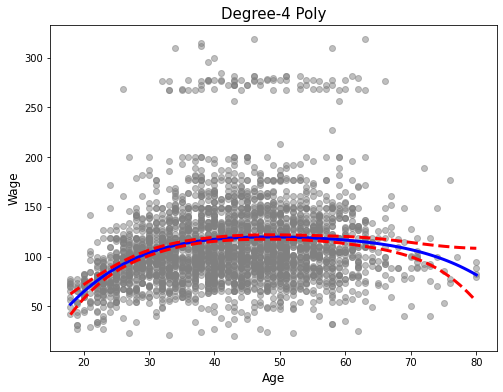

In [8]:
plot_wage_fit(age_df, poly_age, 'Degree-4 Poly')